# 2. 자연어와 분산 처리

자연어 처리가 다루는 분야는 다양하지만, 그 본질적 문제는 **컴퓨터가 우리의 말을 이해**하게 만드는 것이다.

이번 장에서는 컴퓨터에 말을 이해시킨다는 것이 무슨 뜻인지, 그리고 어떤 방법들이 존재하는지를 중심으로 이야기를 풀어보겠다. 특히 고전적인 기법(딥러닝 등장 이전의 기법)들을 자세히 살펴보려 한다.

이번 장에서는 **파이썬으로 텍스트를 다루는 연습**도 겸한다. 텍스트를 단어로 분할하는 처리나 단어를 단어 ID로 변환하는 처리 등을 구현할 것이다.

이번 장은 앞으로의 텍스트 처리를 위한 사전 준비도 겸하고 있다.

## 자연어 처리란

우리가 평소에 쓰는 말을 **자연어**라고 한다. **자연어 처리(NLP)** 을 문자 그대로 해석하면 '자연어를 처리하는 분야'이고, 알기 쉽게 풀어보면 '우리의 말을 컴퓨터에게 이해시키기 위한 기술(분야)'이다. 자연어 처리가 추구하는 목표는 **사람의 말을 컴퓨터가 이해하도록 만들어서, 컴퓨터가 우리에게 도움이 되는 일을 수행하게 만드는 것** 이다.

컴퓨터가 이해할 수 있는 언어라고 하면 프로그래밍 언어나 마크업 언어 같은 것이 떠오를 것이다. 이러한 언어는 모든 코드의 의미를 고유하게 해석할 수 있도록 문법이 정의되어 있고, 컴퓨터는 이 정해진 규칙에 따라서 코드를 해석한다.

일반적인 프로그래밍 언어는 기계적이고 고정되어 있는 '딱딱한 언어'이다. 하지만 자연어는 '부드러운 언어'이다. 부드럽다는 것은 똑같은 의미의 문장도 여러 형태로 표현할 수 있다거나, 문장의 뜻이 애매할 수 있다거나, 그 의미나 형태가 유연하게 바뀐다는 뜻이다.

자연어는 살아 있는 언어이며 그 안에는 '부드러움'이 있다. 따라서 딱딱한 컴퓨터에게 자연어를 이해시키기란 평범한 방법으로는 도달할 수 없다. 하지만 그 난제를 해결할 수 있다면, 즉 컴퓨터에게 자연어를 이해시킬 수 있다면 수많은 사람에게 도움이 되는 일을 컴퓨터에게 시킬 수 있다.

### 단어의 의미

우리의 말은 문자로 구성되며, 말의 의미는 단어로 구성된다. 단어는 **의미의 최소 단위**이다. 그래서 자연어를 컴퓨터에 이해시키는 데는 무엇보다 단어의 의미를 이해시키는 것이 중요하다.

이번 장의 주제는 컴퓨터에게 단어의 의미를 이해시키는 것이다. 더 정확히 말하면 단어의 의미를 잘 파악하는 표현 방법에 관해 생각해본다. 구체적으로는 다음의 세 가지 기법이다.

- 시소러스를 활용한 기법 (이번 장)
- 통계 기반 기법 (이번 장)
- 추론 기반 기법(word2vec) (다음 장)

가장 먼저, 사람의 손으로 만든 시소러스(유의어 사전)을 이용하는 방법을 간단히 살펴본다. 그런 다음 통계 정보로부터 단어를 표현하는 '통계 기반 기법'을 설명한다. 그 뒤를 이어 다음 장에서는 신경망을 활용한 '추론 기반 기법(구체적으로는 word2vec)을 다룬다.

이번 장의 구성은 스탠퍼드 대학교의 'CS224d: Deep Learning Language Processing' 수업을 참고했다.

### 시소러스

단어의 의미를 나타내는 방법으로는 먼저 사람이 직접 단어의 의미를 정의하는 방식을 생각할 수 있다. 그 중 한 방법으로 <표준국어대사전>처럼 각각의 단어에 그 의미를 설명해 넣을 수 있을 것이다. 예컨대, <표준국어대사전>에서 자동차라는 단어를 찾으면 "원동기를 장치하여 그 동력으로 바퀴를 굴려서 철길이나 가설된 선에 의하지 아니하고 땅 위를 움직이도록 만든 차"라는 설명이 나온다. 이런 식으로 단어들을 정의해두면 컴퓨터도 단어의 의미를 이해할 수 있을 것이다.

자연어 처리의 역사를 되돌아보면 단어의 의미를 인력을 동원해 정의하려는 시도는 수없이 있었다. 단 <표준국어대사전> 같이 사람이 이용하는 일반적인 사전이 아니라 **시소러스** 형태의 사전을 애용했다. 시소러스란 (기본적으로는) 유의어 사전으로, 뜻이 같은 단어(동의어)나 뜻이 비슷한 단어(유의어)가 한 그룹으로 분류되어 있다.

    예시) car = auto automobile machine motocar
    car, auto, automobile 등등은 자동차를 뜻하는 동의어이다.
    
자연어 처리에 이용되는 시소러스에는 단어 사이의 상위와 하위, 전체와 부분 등 더 세세한 관계까지 정의해둔 경우가 있다. 각 단어의 관계를 그래프 구조로 정의한다.

<font color = blue> [82페이지 그림 2-2 참고> </font>

"car"의 상위 개념으로 "motor vehicle(동력차)"라는 단어가 존재한다. 한변 "car"의 하위 개념으로는 "SUV(스포츠 유틸리티 자동차)", "compact(소형차)", "hatch-back(해치백)" 등 더 구체적인 차종이 있음을 알려준다.

이처럼 모든 단어에 대한 유의어 집합을 만든 다음, 단어들의 관계를 그래프로 표현하여 단어 사이의 연결을 정의할 수 있다. 그러면 이 단어 네트워크를 이용하여 컴퓨터에게 단어 사이의 관계를 가르칠 수 있다. 이 정도면 컴퓨터에게 단어의 의미를 이해시켰다고 주장할 수 있을 것이다. 그리고 그 지식을 이용하면 우리에게 유용한 일들을 컴퓨터가 수행하도록 할 수 있을 것이다.

<font color = blue> NOTE. 시소러스를 어떻게 사용하는가는 자연어 처리 애플리케이션에 따라 다르다. 검색 엔진을 예로 생각해보면 "automobile"과 "car"가 유의어임을 알고 있으면 "car"의 검색 결과에 "automobile"의 검색 결과도 포함시켜주면 좋을 것이다. </font>

### WordNet

자연어 처리 분야에서 가장 유명한 시소러스는 **WordNet**이다. WordNet은 프린스턴 대학교에서 1985년부터 구축하기 시작한 시소러스로, 지금까지 많은 연구와 다양한 자연어 처리 애플리케이션에서 활용되고 있다.

WordNet을 이용하면 유의어를 얻거나 단어 네트워크를 이용할 수 있다. 또한 단어 네트워크를 사용해 단어 사이의 유사도를 구할 수 있다. 이 책에서는 WordNet을 자세히 설명하지는 않으니, WordNet을 사용한 파이썬 구현에 흥미가 있으면 부록을 참고하자.

### 시소러스의 문제점

WordNet과 같은 시소러스에는 수많은 단어에 대한 동의어와 계층 구조 등의 관계가 정의되어 있다. 그리고 이 지식을 이용하면 단어의 의미를 간접적으로라도 컴퓨터에 전달할 수 있다. 하지만 이처럼 사람이 수작업으로 레이블링하는 방식에는 크나큰 결점이 존재한다. 다음은 시소러스 방식의 대표적인 문제점들이다.

- **시대 변화에 대응하기 어렵다**

우리가 사용하는 말은 살아있다. 신조어가 사어가 시시각각으로 등장한다.

또한, 시대에 따라 언어의 의미가 변하기도 한다. 예컨대 영어 단어 "heavy"에는 심각하다라는 뜻도 있지만, 옛날에는 그런 뜻이 없었다. 이런 단어의 변화에 대응하려면 시소러스를 사람이 수작업으로 끊임없이 갱신해야 한다.

- **사람을 쓰는 비용은 크다**

시소러스를 만드는 데에는 엄청난 인적 비용이 발생한다. 영어를 예로 들면, 현존하는 영어 단어의 수는 1,000만 개가 넘는다. 이상적으로는 이 방대한 단어 모두에 대해 단어 사이의 관계를 정의해줘야 한다. 참고로 WordNet에 등록된 단어는 20만 개 이상이다.

- **단어의 미묘한 차이를 표현할 수 없다**

시소러스에서는 뜻이 비슷한 단어를 묶는다. 하지만 실제로 비슷한 단어들이라도 미묘한 차이가 있는 법이다. 예컨대 vintage와 retro는 의미가 같지만, 용법이 다르다. 시소러스에서는 이러한 미묘한 차이를 표현할 수 없다.

이처럼 시소러스를 사용하는 기법에는 커다란 문제가 있다. 이 문제를 피하기 위해 곧이어 '통계 기반 기법'과 신경망을 사용한 '추론 기반 기법'을 알아볼 것이다. 이 두 기법에서는 **대량의 텍스트 데이터로부터 단어의 의미를 자동으로 추출**한다.

<font color = blue> NOTE. 자연어 처리뿐만 아니라, 이미지 인식에서도 특징을 사람이 수동으로 설계하는 일이 오랜 세월 계속되어왔다. 그러다가 딥러닝이 실용화되면서 실생활 이미지로부터 원하는 결과를 곧바로 얻을 수 있게 됐다. 사람이 개입할 필요가 현격히 줄어든 것이다. 자연어 처리에서도 똑같은 일이 벌어지고 있다. 즉, 사람이 수작업으로 시소러스나 관계를 설계하는 방식으로부터 사람의 개입을 최소로 줄이고 텍스트 데이터만으로 원하는 결과를 얻어내는 방향으로 패러다임이 바뀌고 있다. </font>

## 통계 기반 기법

이젭부터 통계 기반 기법을 살펴보면서 우리는 **말뭉치(corpus)** 를 이용할 것이다. 말뭉치란 간단히 말하면 **대량의 텍스트 데이터**이다. 다만 맹목적으로 수집된 텍스트데이터가 아닌 자연어 처리 연구나 애플리케이션을 염두에 두고 수집된 텍스트 데이터를 일반적으로 말뭉치라고 한다.

결국 말뭉치란 텍스트 데이터에 지나지 않지만, 그 안에 담긴 문장들은 사람이 쓴 글이다. 다른 시각에서 생각해보면, 말뭉치에는 자연어에 대한 사람의 지식이 충분히 담겨 있다고 볼 수 있다.

문장을 쓰는 방법, 단어를 선택하는 방법, 단어의 의미 등 사람이 알고 있는 자연어에 대한 지식이 포함되어 있는 것이다. 통계 기반 기법의 목표는 이처럼 사람의 지식으로 가득한 말뭉치에서 **자동으로, 그리고 효율적으로 그 핵심을 추출**하는 것이다.

<font color = red> WARNING. 자연어 처리에 사용되는 말뭉치에는 텍스트 데이터에 대한 추가 정보가 포함되는 경우가 있다. 예컨대 텍스트 데이터의 단어 각각에 품사가 레이블링될 수 있다. 이럴 경우 말뭉치는 컴퓨터가 다루기 쉬운 형태(트리 구조 등)로 가공되어 주어지는 것이 일반적이다. 이 책에서는 이러한 추가 레이블을 이용하지 않고, 단순한 텍스트 데이터로 주어졌다고 가정한다. </font>

### 파이썬으로 말뭉치 전처리하기

자연어 처리에는 다양한 말뭉치가 사용된다. 유명한 것으로는 위키백과와 구글 뉴스 등의 텍스트 데이터를 들 수 있다. 또한 셰익스피어나 나쓰메 소세키 같은 대문호의 작품들도 말뭉치로 이용된다. 이번 장에서는 우선 문장 하나로 이뤄진 단순한 텍스트를 사용한다. 그런 후에 더 실용적인 말뭉치도 다뤄보도록 한다.

그렇다면 매우 작은 텍스트 데이터(말뭉치)에 전처리를 해보자. 여기서 말하는 전처리란 **텍스트 데이터를 단어로 분할하고, 그 분할된 단어들을 단어 ID 목록으로 변환**하는 일이다.

하나씩 확인하면서 단꼐별로 진행해보자. 말뭉치로 이용할 예시 문장부터 한 번 만나보자.

In [10]:
text = "You say goodbye and I say hello."

이번 절에서는 이처럼 문장 하나로 이뤄진 텍스트를 말뭉치로 이용한다. 실전이라면 이 text에 수천, 수만 개가 넘는 문장이 담겨 있을 것이다.

하지만 지금은 쉽게 설명하기 위해 작은 텍스트 데이터만으로 전처리를 수행하겠다. 그럼 이 text를 단어 단위로 분할해보자.

In [11]:
text = text.lower()
text = text.replace('.', ' .')
text

words = text.split(' ')
words

['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']

    가장 먼저 lower() 메서드를 이용해 모든 문자를 소문자로 변환한다. 문장 첫 머리의 대문자로 시작하는 단어도 소문자 단어와 똑같이 취급하기 위함이다.
    
    그리고 split(' ') 메서드를 호출해 공백을 기준으로 분할한다.
    
    다만 여기에서는 문장 끝의 마침표를 고려해 마침표 앞에서 공백을 삽입해서(text.replace로 '.'을 ' .'으로 변환) 분할을 수행했다.

<font color = red> 여기에서는 분할할 때 마침표 앞에 공백을 넣는 임시변통을 적용했지만, 더 현명하고 범용적인 방법이 있다. 바로 정규표현식을 이요하는 방법이다. 예를 들어 정규표현식 모듈을 re을 임포트하고 re.split('(\W+)?'.text)라고 호출하면 단어 단위로 분할할 수 있다. 정규표현식에 관한 상세한 설명은 정규표현식(제이펍, 2016) 등의 다른 책을 참고하자. </font>

이제 원래의 문장을 단어 목록 형태로 이용할 수 있게 되었다.

단어 단위로 분할되어 다루기가 쉬워진 것은 사실이지만, 단어를 텍스트 그대로 조작하기란 여러 면에서 불편하다. 그래서 **단어에 ID를 부여**하고, ID의 리스트로 이용할 수 있도록 한 번 더 손질한다. 이를 위한 사전 준비로, Python의 딕셔너리를 이용하여 단어 ID와 단어를 짝지어주는 대응표를 작성한다.

In [12]:
word_to_id = {}
id_to_word = {}

for word in words:
    if word not in word_to_id:
        new_id = len(word_to_id)
        word_to_id[word] = new_id
        id_to_word[new_id] = word

    단어 ID에서 단어로의 변환은 id_to_word가 담당한다(키가 단어 ID, 값이 단어).
    
    단어에서 단어 ID로의 변화은 word_to_id가 담당한다(키가 단어, 값이 단어 ID).
    
    앞의 코드는 단어 단위로 분할된 words의 각 원소를 처름부터 하나씩 살펴보면서, 단어가 word_to_id에 들어 있지 않으면 word_to_id와 id_to_word 각각에 새로운 ID와 단어를 추가한다.
    
    또한 추가 시점의 딕셔너리 길이가 새로운 단어의 ID로 설정되기 때문에 단어 ID는 0, 1, 2, ... 식으로 증가한다.

In [13]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

In [14]:
word_to_id

{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}

이처럼 딕셔너리를 사용하면 단어를 가지고 단어 ID를 검색하거나, 반대로 단어 ID를 가지고 단어를 검색할 수 있다.

In [17]:
id_to_word[1]

'say'

In [18]:
word_to_id['hello']

5

그럼 마지막을 단어 목록을 '단어 ID 목록'으로 변경해보자. 다음 코드에서는 파이썬의 내포(comprehension) 표기를 사용하여 단어 목록에서 단어 ID 목록으로 변환한 다음, 다시 넘파이 배열로 변환했다.

In [20]:
import numpy as np
corpus = [word_to_id[w] for w in words]
corpus = np.array(corpus)
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

<font color = blue> NOTE. 내포란 리스트나 딕셔너리 등의 반복문 처리를 간단하게 쓰기 위한 기법이다. 예컨대 xs = [1,2,3,4]라는 리스트의 각 원소를 제곱하여 새로운 리스트를 만들고 싶다면 [x**2 for x in xs] 처럼 쓰면 된다. </font>

In [22]:
xs = [1,2,3,4]
xs_list = [x ** 2 for x in xs]
xs_list

[1, 4, 9, 16]

이상의 처리를 한 데 모아 preprocess()라는 함수로 구현해보자.

In [23]:
def preprocess(text):
    text = text.lower()
    text = text.replace('.', ' .')
    ## 단어 분할을 쉽게 하기 위해 대문자를 소문자로 바꾸고, 마침표를 하나 띄어준다.
    words = text.split(' ')
    ## 공백을 기준으로 단어를 분할한다.
    
    word_to_id = {}
    id_to_word = {}
    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word
    ## id를 word_to_id의 길이로 설정하고, 각각의 딕셔너리와 key와 value를 설정한다.
    ## 중복을 피하기 위해 if문을 설정해 word_to_id에 없는 단어로 한정한다.
    
    corpus = np.array([word_to_id[w] for w in words])
    
    return corpus, word_to_id, id_to_word

text = "You say goodbye and I say hello."
corpus, word_to_id, id_to_word = preprocess(text)

    corpus : 단어 ID 목록
    word_to_id : 단어에서 단어 ID로의 dictionary
    id_to_word : 단어 ID에서 단어로의 dictionary
    
이상으로 말뭉치를 다룰 준비를 마쳤다. 우리의 다음 목표는 말뭉치를 사용해 **'단어의 의미'를 추출**하는 것이다.

그 한 방법으로, 이번 절에서는 '통계 기반 기법'을 살펴본다. 이 기법을 사용해 우리는 단어를 벡터로 표현할 수 있게 될 것이다.

### 단어의 분산 표현

세상은 다채로운 색으로 가득하다. 이러한 색들에는 '코발트블루'나 '싱크레드'같은 고유한 이름을 붙일 수 있다.

한편 RGB(Red/Green/Blue)라는 세 가지 성분이 어떤 비율이 섞여 있느냐로 표현하는 방법도 있다. 전자는 색의 가짓수만큼의 이름을 부여하는 한편, 후자는 색을 3차원의 벡터로 표현한다.

여기서 주목할 것은 RGB 같은 벡터 표현이 색을 더 명확하게 명시할 수 있다는 사실이다. 모든 색을 단 3개의 성분으로 간결하게 표현할 수 있고, (많은 경우) 어떤 색인지 짐작하기도 쉽다. 예를 들어 비색이라고 하면 어떤 색인지 잘 몰라도, $(R, G, B) = (170, 33, 22)$라고 한다면 빨강 계열의 색임을 알 수 있다. 또한, 색끼리의 관련성(비슷한 색인지 여부 등)도 벡터 표현 쪽이 더 쉽게 판단할 수 있고, 정량화하기도 쉽다.

그렇다면 색을 벡터로 표현하듯 단어도 벡터로 표현할 수 있을까? 더 정확하게 말하자면, 간결하고 이치에 맞는 벡터 표현을 단어라는 영역에서도 구축할 수 있을끼? 이제부터 우리가 원하는 것은 **'단어의 의미'를 정확하게 파악할 수 있는 벡터 표현**이다. 이를 자연어 처리 분야에서는 **단어의 분산 표현**이라고 한다.

<font color = blue> NOTE. 단어의 분산 표현은 단어를 고정 길이의 밀집벡터로 표현한다. 밀집벡터라고 함은 대부분의 원소가 0이 아닌 실수인 벡터를 말한다. 예컨대 3차원의 분산 표현은 $[0.21, -0.45, 0.83]$와 같은 모습이 된다. 이러한 단어의 분산 표현을 **어떻게 구축할 것인가**가 앞으로 살펴볼 중요한 주제이다. </font>

### 분포 가설

자연어 처리의 역사에서 단어를 벡터로 표현하는 연구는 수없이 이루어져 왔다. 그 연구들을 살펴보면, 중요한 기법의 거의 모두가 단 하나의 간단한 아이디어에 뿌리를 두고 있음을 알 수 있다. 그 아이디어는 바로 **'단어의 의미는 주변 단어에 의해 형성된다'** 라는 것이다. 이를 **분포 가설**이라고 하며, 단어를 벡터로 표현하는 최근 연구도 대부분 이 가설에 기초한다. 

분포 가설이 말하고자 하는 바는 매우 간단하다. **단어 자체에는 의미가 없고, 그 단어가 사용된 맥락(context)이 의미를 형성**한다는 것이다. 물론 의미가 같은 단어들은 같은 맥락에서 더 많이 등장한다.

예를 들어 "I drink beer"와 "We drink wine"처럼 "drink"의 주변에는 음료가 등장하기 쉬울 것이다. 또, "I guzzle beer"와 "We guzzle wine"이라는 문장이 있다면, "guzzle"은 "drink"와 같은 맥락에서 사용됨을 알 수 있다. 그리고 "guzzle"과 "drink"는 가까운 의미의 단어라는 것을 알 수 있다.

앞으로는 맥락이라는 말을 자주 사용할 것이다. 이번 장에서 맥락이라 하면 **주목하는 단어 주변에 놓인 단어**를 가리킨다. 예컨대 아래 그림에서는 좌우의 각 두 단어씩이 맥락에 해당한다.

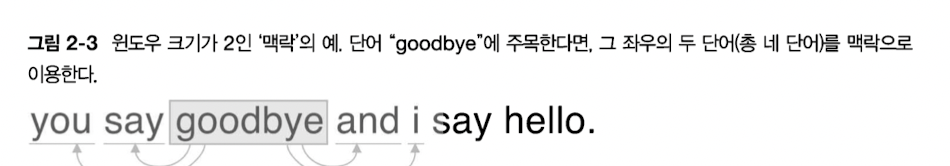

In [2]:
from IPython.display import Image
Image("/Users/choeunsol/Python/주피터 이미지용 사진/ch2_3.png")

위 그림처럼 '맥락'이란 **특정 단어를 중심에 둔 그 주변 단어**를 말한다.

그리고 **맥락의 크기(주변 단어를 몇 개나 포함할지)를 윈도우 크기**라고 한다. 윈도우 크기가 1이면 좌우 한 단었깅, 윈도우 크기가 2이면 좌우 두 단어씩이 맥락에 포함된다.

<font color = red> WARNING. 여기에서는 좌우로 똑같은 수의 단어를 맥락으로 사용했다. 하지만 상황에 따라서는 왼쪽 단어만 또는 오른쪽 단어만을 사용하기도 하며, 문장의 시작과 끝을 고려할 수도 있다. 이 책에서는 이해하기 쉽게 설명하고자 문장 구분은 고려하지 않고 좌우 동수인 맥락만을 취급한다. </font>

### 동시발생 행렬

그렇다면 분포 가설에 기초에 단어를 벡터로 나타내는 방법을 생각해보자. 주변 단어를 '세어 보는' 방법이 자연스럽게 떠오를 것이다.

어떤 단어를 주목했을 때, 그 주변에 어떤 단어가 몇 번이나 등장하는지를 세어 집계하는 방법이다. 이 책에서는 이를 '통계 기반 방법'이라고 할 것이다.

그럼 통계 기반 기법을 살펴보자. 먼저 말뭉치와 preprocess() 함수를 사용해 전처리하는 일부터 시작할 것이다.

In [26]:
import os, sys
os.getcwd()

'/Users/choeunsol/Python/밑바닥부터 시작하는 딥러닝 2'

In [45]:
os.chdir("/Users/choeunsol/Python/deep_learning_from_scratch/deep-learning-from-scratch-2-master/ch02")
sys.path.append(os.pardir)
import numpy as np
from common.util import preprocess

text = "You say goodbye and I say hello."
corpus, word_to_id, id_to_word = preprocess(text)

print(corpus)

[0 1 2 3 4 1 5 6]


In [46]:
print(id_to_word)

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


결과를 보면 단어 수가 총 7개임을 알 수 있다. 다음으로는 각 단어의 맥락에 해당하는 단어의 빈도를 세어보겠다.

윈도우 크기는 1로 하고, 단어 ID가 0인 "you"부터 시작해보자. 윈도우의 크기가 1이라면, 단어 "you"의 맥락은 "say"라는 단어 하나뿐이다. 이를 표로 정리하면 다음과 같다.

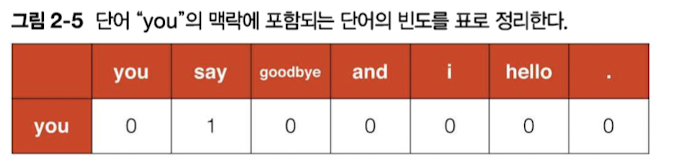

In [31]:
Image("/Users/choeunsol/Python/주피터 이미지용 사진/ch2_5.png")

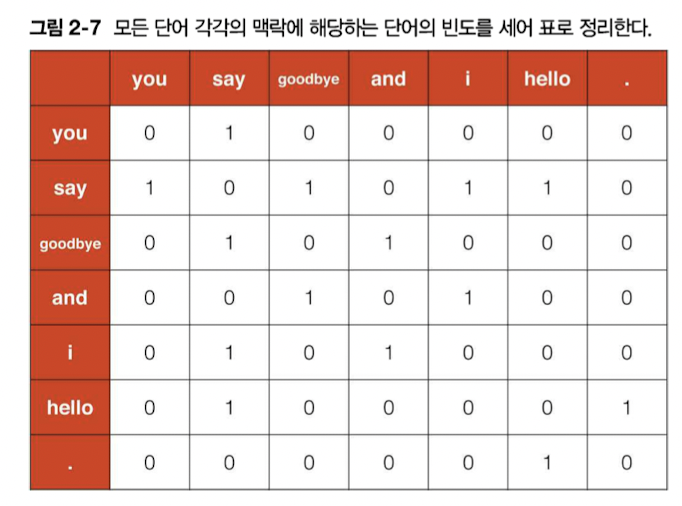

In [34]:
Image("/Users/choeunsol/Python/주피터 이미지용 사진/ch2_7.png")

위 그림은 모든 단어에 대해 **동시발생하는 단어**를 표에 정리한 것이다.

이 표의 각 행은 **해당 단어를 표현한 벡터**가 된다. 참고로 이 표가 행렬의 형태를 띈다는 뜻에서 **동시발생 행렬**이라고 한다.

그렇다면 이 동시발생 행렬을 파이썬으로 구현해보자. 여기에서는 그림 그대로를 손으로 입력해보도록 하겠다.

In [47]:
C = np.array([[0,1,0,0,0,0,0], [1,0,1,0,1,1,0], [0,1,0,1,0,0,0], [0,0,1,0,1,0,0], [0,1,0,1,0,0,0], [0,1,0,0,0,0,1], [0,0,0,0,0,1,0]], dtype = np.int32)

이것으로 동시발생 행렬이 생겼다. 이 동시발생 행렬을 사용하면 다음과 같은 방식으로 각 단어의 벡터를 얻을 수 있다.

In [48]:
print(C[0]) # ID가 0인 단어의 벡터 표현

[0 1 0 0 0 0 0]


In [49]:
print(C[4]) # ID가 4인 단어의 벡터 표현

[0 1 0 1 0 0 0]


In [50]:
print(C[word_to_id['goodbye']]) # "goodbye"의 벡터 표현

[0 1 0 1 0 0 0]


이와 같이 동시발생 행렬을 활용하면 단어를 벡터로 나타낼 수 있다.

이번에는 동시발생 행렬을 수동으로 만들었지만, 당연히 자동화할 수 있다. 그러면 말뭉치로부터 동시발생 행렬을 만들어주는 함수를 구현해보자.

    함수 이름은 create_co_matrix(corpus, vocab_size, window_size = 1)으로 구현한다.
    인수들은 차례대로 단어 ID의 리스트, 어휘 수, 윈도우 크기를 나타낸다.

In [55]:
def create_co_matrix(corpus, vocab_size, window_size = 1):
    corpus_size = len(corpus) # 말뭉치의 길이가 곧 corpus_size가 된다.
    co_matrix = np.zeros((vocab_size, vocab_size), dtype = np.int32)
    
    for idx, word_id in enumerate(corpus): # enumerate 함수는 리스트의 원소에 순서값을 부여해준다.
        for i in range(1, window_size + 1):
# 두 개의 반복문이 필요하다.
## 첫 번째는 corpus에서 단어의 id를 찾기 위한 반복으로, corpus의 index를 끌어내기 위해 enumerate을 사용한다.
## 두 번째는 window에 의해 left_idx와 right_idx를 산출하기 위한 반복문으로, window_size에 따라 범위를 설정해준다.
            left_idx = idx - i
            right_idx = idx + i
            # left_idx와 right_idx은 윈도우의 크기를 고려해 단어의 맥락에 index를 부여해준다.
            
            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1
                
            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1
            ## left_idx와 right_idx를 말 그대로 인덱스라 생각하고 말뭉치에서 index로 찾는다는 개념으로 접근하자.
    
                
    return co_matrix

create_co_matrix(corpus, len(corpus)-1)

array([[0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0]], dtype=int32)

    먼저 co_matrix를 0으로 채워진 2차원 배열로 초기화한다.
    
    그 다음 말뭉치의 모든 단어 각각에 대하여 윈도우에 포함된 주변 단어를 세어나간다.
    
    이 때 말뭉치의 왼쪽 끝과 오른쪽 끝 겨계를 벗어나지 않는지도 확인한다.
    
 이 함수는 말뭉치가 아무리 커지더라도 자동으로 동시발생 행렬을 만들어준다. 앞으로 말뭉치의 동시발생 행렬을 만들 때면 언제나 이 함수를 사용할 것이다.

### 벡터 간 유사도

앞에서 동시발생 행렬을 활용해 **단어를 벡터로 표현하는 방법**을 알아보았다. 계속해서 벡터 사이의 유사도를 측정하는 방법을 살펴보자.

벡터 사이의 유사도를 측정하는 방법은 다양하다. 대표적으로는 벡터의 내적이나 유클리드 거리 등을 꼽을 수 있다. 그 외에도 다양하지만, 단어 벡터의 유사도를 나타낼 때는 **코사인 유사도**를 자주 이용한다.

두 벡터 $\boldsymbol x = (x_1, x_2, x_3, \cdots, x_n)$과 $\boldsymbol y = (y_1, y_2, y_3, \cdots, y_n)$이 있다면, 코사인 유사도는 다음과 같이 정의된다.

$$similarity(\boldsymbol x, \boldsymbol y) = \
\frac{\boldsymbol x \cdot \boldsymbol y}{\left \Vert \boldsymbol x \right \| \left \Vert \boldsymbol y \right \|} = \
\frac{x_1y_1 + \cdots + x_ny_n}{\sqrt{x_1^2 + \cdots + x_n^2} \sqrt{y_1^2 + \cdots + y_n^2}}$$

분자에는 벡터의 내적이, 분모는 각 벡터의 노름(norm)이 등장한다.

노름은 **벡터의 크기**를 나타낸 것으로, 여기에서는 'L2 노름'을 계산한다.

이 식의 핵심은 벡터를 **정규화**하고 <font color = purple> (벡터를 벡터의 크기로 나눔으로써 normalize한다) </font>

내적을 구하는 것이다. <font color = purple> ($\frac{\boldsymbol x}{\left \Vert \boldsymbol x \right \|} \cdot \frac{\boldsymbol y}{\left \Vert \boldsymbol y \right \|}$ </font>)

<font color = blue> NOTE. 코사인 유사도를 직관적으로 풀어보자면 **'두 벡터가 가리키는 방향이 얼마나 비슷한가'**이다. 두 벡터의 방향이 완전히 같다면 **코사인 유사도가 1이 되며**, 완전히 반대라면 **-1이 된다.** </font>

이제 코사인 유사도를 파이썬 함수로 구현해보자.

In [60]:
def cos_similarity(x, y):
    nx = x / np.sqrt(np.sum(x**2))
    ny = y / np.sqrt(np.sum(y**2))
    return np.dot(nx, ny)

    이 코드에서 인수 x와 y는 넘파이 배열이라 가정한다.
    
    벡터 x와 y를 정규화시키고(nx, ny), 두 벡터의 내적을 구했다(np.dot(nx, ny)).

이렇게만 해도 코사인 유사도를 구할 수 있지만, 사실 이 구현에는 문제가 있다.

인수로 제로 벡터가 들어오면 0으로 나누기 오류가 발생해버린다.

이 문제를 해결하는 전통적인 방법은 나눌 때 분모에 작은 값을 더해주는 것이다.

작은 값을 뜻하는 eps를 인수로 받도록 하고, 이 인수의 값을 지정하지 않으면 기본값으로 1e-8이 설정하도록 수정한다.

In [61]:
def cos_similarity(x, y, eps = 1e-8):
    nx = x / (np.sqrt(np.sum(x**2)) + eps)
    ny = y / (np.sqrt(np.sum(y**2)) + eps)
    return np.dot(nx, ny)

<font color = blue> NOTE. 여기에서는 작은 값으로 1e-8을 사용했는데, 이 정도 작은 값이면 일반적으로 부동소수점 계산 시 반올림되어 다른 값에 흡수된다. 앞의 구현에서는 이 값이 벡터의 노름에 흡수되기 때문에 대부분의 경우 eps을 더한다고 해서 최종 계산 결과에는 영향을 주지 않는다. 한편, 벡터의 노름이 0일 대는 이 작은 값이 그대로 유지되어 '0으로 나누기' 오류가 나는 사태를 막아준다. </font>

이 함수를 사용하면 단어 벡터의 유사도를 다음과 같이 구할 수 있다.

다음은 "you"와 "i(=I)"의 유사도를 구하는 코드이다.

In [62]:
import sys, os
os.getcwd()

'/Users/choeunsol/Python/deep_learning_from_scratch/deep-learning-from-scratch-2-master/ch02'

In [65]:
sys.path.append(os.pardir)
from common.util import preprocess, create_co_matrix, cos_similarity

text = "You say goodbye and I say hello."
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

c0 = C[word_to_id['you']] # "you"의 단어 벡터
c1 = C[word_to_id['i']] # "i"의 단어 벡터

print(cos_similarity(c0, c1))

0.7071067691154799


실행 결과 "you"와 "i"의 코사인 유사도는 0.71 정도로 나왔다.

코사인 유사도 값은 -1에서 1 사이이므로, 이 값은 비교적 높다(유사성이 크다)라고 말할 수 있다.

### 유사 단어의 랭킹 표시

코사인 유사도까지 구현했으니, 이 함수를 이용해 또 다른 유용한 기능을 구현해보자.

어떤 단어가 검색어로 주어지면, 그 검색어와 비슷한 단어를 유사도 순으로 출력하는 함수는 어떨까? 함수 이름은 most_similar()로 하고, 다음 인수들을 입력받도록 구현해보자.

- query : 검색어(단어)
- word_to_id : 단어에서 단어 ID로의 딕셔너리
- id_to_word : 단어 ID에서 단어로의 딕셔너리
- word_matrix : 단어 벡터들을 한데 모은 행렬. 각 행에는 대응하는 단어의 벡터가 저장되어 있다고 가정.
- top : 상위 몇 개까지 출력할지 설정

most_similar() 함수의 구현은 다음과 같다.

In [67]:
def most_similar(query, word_to_id, id_to_word, word_matrix, top = 5):
    # 1. 검색어를 꺼낸다.
    if query not in word_to_id:
        print('%s(을)를 찾을 수 없습니다.' % query) # 출력 : (query name)을(를) 찾을 수 없습니다.
        return
    
    print('\n[query]' + query) # 출력 : [query] (query의 name)
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]
    
    # 2. 코사인 유사도 계산
    vocab_size = len(id_to_word)
    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec)
        
    # 3. 코사인 유사도를 기준으로 내림차순으로 출력
    count = 0
    for i in (-1 * similarity).argsort():
        if id_to_word[i] == query:
            continue # 아래를 진행하지 않고 계속 진행해라
        print('%s : %s' % (id_to_word[i], similarity[i])) # 출력 : id_to_word[i] : similarity[i]
        
        count += 1
        if count >= top:
            return

이 코드는 다음 순서로 동작한다.

- 1. 검색어의 단어 벡터를 꺼낸다.
- 2. 검색어의 단어 벡터와 다른 모든 단어 벡터와의 코사인 유사도를 각각 구한다.
- 3. 계산한 코사인 유사도 결과를 기준으로 값이 높은 순서대로 출력한다.

3에서는 similarity 배열에 담긴 원소의 인덱스를 내림차순으로 정렬한 후 상위 원소들을 출력한다.

예를 한 번 보자.

In [68]:
x = np.array([100, -20, 2])
x.argsort()

array([1, 2, 0])

이 코드는 $[100, -20, 2]$라는 넘파이 배열의 원소들을 오름차순으로 정렬했다.

즉, 앞의 겨로가는 인덱스가 1인 원소(-20), 2인 원소(2), 0인 원소(100) 순으로 정렬된 것이다.

우리의 목적은 단어의 유사도가 큰 순서로 정렬하는 것이었으므로, 넘파이 배열의 각 원소에 마이너스를 곱한 후 argsort() 메서드를 호출하면 원하는 결과를 얻을 수 있다.

In [69]:
(-x).argsort()

array([0, 2, 1])

그렇다면 이 함수를 사용해보자. "you"를 검색어로 지정해 유사한 단어를 출력해보겠다.

In [72]:
from common.util import preprocess, create_co_matrix, most_similar

text = "You say goodbye and I say hello."
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

most_similar('you', word_to_id, id_to_word, C, top = 5)


[query] you
 goodbye: 0.7071067691154799
 i: 0.7071067691154799
 hello: 0.7071067691154799
 say: 0.0
 and: 0.0


In [73]:
most_similar("sad", word_to_id, id_to_word, C, top = 5)

sad(을)를 찾을 수 없습니다.


말뭉치의 크기가 작아 직관과는 거리가 먼 결과가 나왔는데, 앞으로 큰 말뭉치를 사용해 똑같은 실험을 해볼 것이다.

동시발생 행렬을 사용하면 **단어를 벡터로 표현**할 수 있다. 이것으로 통계 기반 기법의 기본을 끝마칠 것이다. 다음 절에서는 지금의 방법을 한층 개선하는 아이디어를 설명하고 실제로 구현할 것이다.

## 통계 기반 기법 개선하기

앞 절에서는 단어의 동시발생 행렬을 만들었다. 이를 이용해 단어를 벡터로 표현하는 데는 성공했는데, 동시발생 행렬에는 아직 개선할 점이 남아 있다.

이번 절에서는 이 개선 작업을 진행할 것이다. 그리고 개선이 완료된 다음에는 더 실용적인 말뭉치를 사용하여 진짜 단어의 분산 표현을 손에 넣어볼 것이다.

### 상호정보량 

앞 절에서 본 동시발생 행렬의 원소는 두 단어가 동시에 발생한 횟수를 나타낸다.

그러나 이 발생 횟수라는 것은 사실 그리 좋은 특징이 아니다. 고빈도 단어로 눈을 돌려보면 그 이유를 알 수 있다.

예컨대 말뭉치에서 "the"와 "car"의 동시발생을 생각해보자. 분명 "... the car ..."라는 문구가 자주 보일 것이다. 따라서 두 단어의 동시발생 횟수는 아주 많을 것이다.

한편, "car"와 "drive"는 확실히 관련이 깊다. 하지만 단순히 등장 횟수로만 본다면 "car"은 "drive"보다는 "the'와의 관련성이 훨씬 강하다고 나올 것이다. "the"가 고빈도 단어라서 "car"와 강한 관련성을 갖는다고 평가되기 때문이다.

이 문제를 해결하기 위해 **점별 상호정보량(PMI)** 라는 척도를 사용한다.

PMI는 확률 변수 $x$와 $y$에 대해 다음 식으로 정의된다.

$$ \boldsymbol{PMI} (x, y) = log_2 \frac{P(x,y)}{P(x)P(y)} $$

$P(x)$는 $x$가 일어날 확률, $P(y)$는 $y$가 일어날 확률, $P(x,y)$는 $x, y$가 동시에 일어날 확률이다. 이 PMI 값이 높을수록 관련성이 높다는 의미이다.

이 식을 앞의 자연어 예에 적용하면 $P(x)$는 단어 $x$가 말뭉치에 등장할 확률을 가리킨다. 예를 들어 10,000개의 단어로 이루어진 말뭉치에서 "the"가 100번 등장한다면 $P("the") = \frac{100}{10000} = 0.01$이 된다.

또한 $P(x, y)$는 $x$와 $y$가 동시발생할 확률이므로, 마찬가지로 "the"와 "car"가 10번 동시발생했다면, $P("the", "car") = \frac{10}{10000} = 0.001$이 되는 것이다.

그렇다면 동시발생 횅렬을 사용하여 위 식을 다시 써보자. $C$는 동시 발생 행렬, $C(x,y)$는 단어 $x, y$가 동시발생하는 횟수, $C(x)$와 $C(y)$는 각각 단어 $x, y$의 등장 횟수이다. 이 때 말뭉치에 포함된 단어 수를 $N$이라고 하면, 위 식은 다음과 같이 변한다.

$$\boldsymbol{PMI}(x,y) = log_2 \frac{P(x,y)}{P(x)P(y)} = log_2 \frac{\frac{C(x,y)}{N}}{\frac{C(x)}{N}\frac{C(y)}{N}} = log_2\frac{C(x,y) \cdot N}{C(x)C(y)}$$

구체적으로 예를 들어보자.

말뭉치의 단어 수($N$)을 10,000이라고 하고, "the"와 "car"와 "drive"가 각각 1,000번, 20번, 10번 등장했다고 해보자. 그리고 "the"와 "car"의 동시발생 수는 10회, "car"와 "drive"의 동시발생 수는 5회라고 가정하자.

이 조건이라면, 동시발생 횟수 관점에서는 "car"는 "drive"보다 "the"와 관련이 깊다고 나온다. 그렇다면 PMI 관점에서는 어떻까? PMI 계산 결과는 다음과 같다.

$$\boldsymbol{PMI}("the", "car") = log_2 \frac{10 \cdot 10000}{1000 \cdot 20} \approx 2.32 \\
\boldsymbol{PMI}("car", "drive") = log_2 \frac{5 \cdot 10000}{20 \cdot 10} \approx 7.97$$

이 결과에서 알 수 있듯이 **PMI를 이용하면 "car"는 "the"보다 "drive"와의 관련성이 강해진다**. 이러한 결과가 나온 이유는 **단어가 단독으로 출현하는 횟수**가 고려되었기 때문이다. 이 예에서는 "the"가 자주 출현했으므로 PMI 점수가 낮아진다.

PMI에도 문제는 있다. 두 단어의 동시 발생 횟수가 0이면 $log_2 0 = - \infty$가 된다는 것이다. 이 문제를 피하기 위해 실제로 구현할 때는 **양의 상호 정보량(PPMI)을 사용**한다.

$$\boldsymbol{PPMI}(x,y) = max(0, \boldsymbol{PMI}(x,y))$$

이 식에 따라 **PMI가 음수일 때는 0으로 취급**한다. 이제 단어 사이의 관련성을 0 이상의 실수로 나타낼 수 있다. 그렇다면 동시발생 행렬을 PPMI 행렬로 변환하는 함수를 구현해보자.

    이 함수의 이름은 ppmi(C, verbose = False, eps = 1e-8)으로 짓는다.

In [1]:
def ppmi(C, verbose = False, eps = 1e-8):
    M = np.zeros_like(C, dtype = np.int32)
    N = np.sum(C)
    S = np.sum(C, axis = 0)
    total = C.shape[0] * C.shape[1]
    cnt = 0
    
    # 1. 빈도수에 따른 pmi 행렬을 출력한다.
    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            pmi = np.log2(C[i, j] * N / (S[j] * S[i]) + eps)
            M[i, j] = max(0, pmi)
    
    # 2. verbose = True일 때 진행 사항을 알려주는 조건문을 만든다.
            if verbose:
                cnt += 1
                if cnt % (total / 100) == 0:
                    print('%.1f%% 완료' % (100*cnt / total))
    return M

    여기에서 인수 C는 동시발생 행렬, verbose는 진행상황 출력 여부를 결정하는 플래그이다.
    
    큰 말뭉치를 다룰 때 verbose = True로 설정하면 중간중간 진행 상황을 알려준다.
    
이 코드는 동시발생 행렬에 대해서만 PPMI 행렬을 구할 수 있도록 하고자 단순화해 구현했다.

구체적으로 말하면, 단어 $x, y$가 동시에 발생하는 횟수를 $C(x, y)$라 했을 때, $C(x) = \sum_{i} C(i,x), C(y) = \sum_{i} C(i,y), N = \sum_i \sum_j C(i,j)$가 되도록 (즉, 근삿값을 구하도록) 구현했다.

한 가지 더하면, 로그값이 음의 무한대가 되는 사태를 피하기 위해 eps라는 작은 값을 사용했다.

<font color = blue> NOTE. '2.3.5 벡터 간 유사도' 절에서는 '0으로 나누기' 오류를 막기 위해 분모의 작은 값을 더했다. 이번에도 마찬가지로 $log2(x)$ 계산을 $log2(x+eps)$로 수정하여 값이 음의 무한대로 빠지는 사태를 예방했다. </font> 

그렇다면 동시발생 행렬을 PPMI 행렬로 변환해보자. 이는 다음처럼 구현할 수 있다.

In [2]:
import sys, os
os.getcwd()

'/Users/choeunsol/Python/밑바닥부터 시작하는 딥러닝 2'

In [7]:
os.chdir("/Users/choeunsol/Python/deep_learning_from_scratch/deep-learning-from-scratch-2-master/ch02")
sys.path.append(os.pardir)
import numpy as np
from common.util import preprocess, create_co_matrix, cos_similarity, ppmi

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

np.set_printoptions(precision = 3) # 유효 자릿수를 세 자리로 표시
print('동시발생 행렬')
print(C)
print('-' * 50) #  중간 줄 생성
print('PPMI')
print(W)

동시발생 행렬
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


이것을 동시발생 행렬을 PPMI 행렬로 변환하는 법을 알아보았다. 이때 PPMI 행렬의 각 원소는 0 이상의 실수이다. 이제 우리는 더 좋은 척도로 이루어진 행렬(더 좋은 단어 벡터)을 손에 쥐었다.

그러나 PPMI 행렬에도 여전히 큰 문제가 있다. 말뭉치의 어휘 수가 증가함에 따라 **각 단어 벡터의 차원 수도 증가한다는 문제**이다. 예를 들어 말뭉치의 어휘 수가 10만 개라면 그 벡터의 차원 수도 똑같이 10만이 된다. 10만 차원의 벡터를 다룬다는 것은 그다지 현실적이지 않다.

또한, 이 행렬의 내용을 들여다보면 **원소 대부분이 0인 것**을 알 수 있다. 벡터의 원소 대부분이 중요하지 않다는 것이다. 다르게 표현하면 **각 원소의 '중요도'가 낮다**라는 것이다. 더구나 이런 벡터는 노이즈에 약하고 견고하지 못하다는 약점도 있다.

이 문제에 대처하고자 자주 수행하는 기법이 **벡터의 차원 감소**이다.

### 차원 감소

**차원 감소**는 문자 그대로 벡터의 차원을 줄이는 방법을 말한다. 단순히 줄이기만 하는 것이 아니라, **중요한 정보는 최대한 유지하면서 줄이는 것**이 핵심이다.

직관적인 예로, [그림 2-8]처럼 데이터의 분포를 고려해 **중요한 '축'을 찾는 일을 수행**한다.

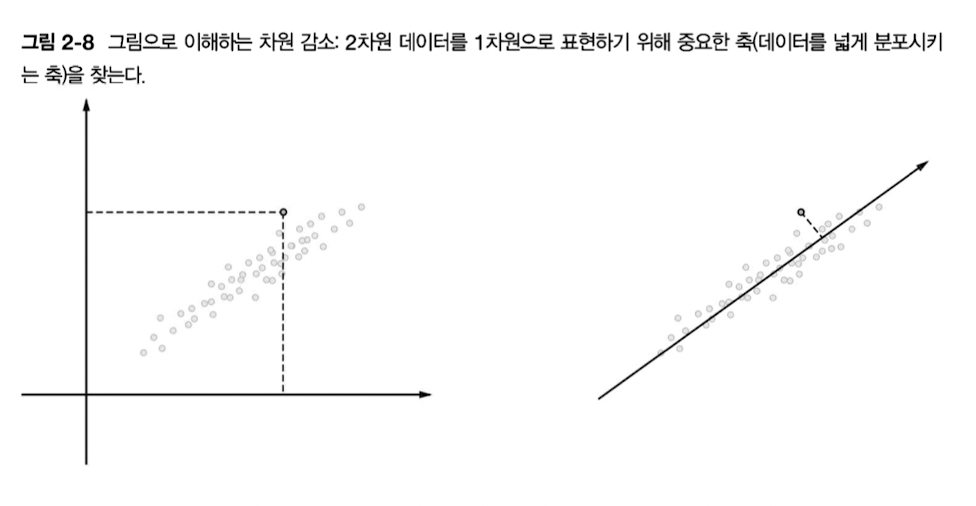

In [11]:
Image("/Users/choeunsol/Python/주피터 이미지용 사진/ch2_8.png")

[그림 2-8]의 왼쪽은 데이터점들을 2차원 좌표에 표시한 모습이다. 그리고 오른쪽은 새로운 축을 도입하여 똑같은 데이터를 좌표축 하나만으로 표시했다(새로운 축을 찾을 때에는 데이터가 넓게 분포되도록 고려해야 한다).

이때 각 데이터점의 값은 새로운 축으로 projection된 값으로 변한다. 여기서 중요한 것은 **가장 적합한 축**을 찾아내는 것으로, **1차원 값만으로도 데이터의 본질적인 차이를 구별**할 수 있어야 한다. 이와 같은 작업은 다차원 데이터에 대해서도 수행할 수 있다.

<font color = blue> 원소 대부분이 0인 행렬 또는 벡터를 '희소행렬' 또는 '희소벡터'라고 한다. 차원 감소의 핵심은 **희소 벡터에서 중요한 축을 찾아내어 더 적은 차원으로 다시 표현**하는 것인데, 차원 감소의 결과로 원래의 희소벡터는 **원소 대부분이 0이 아닌 값으로 구성된 밀집벡터**로 변한다. 이 조밀한 벡터야말로 우리가 원하는 단어의 분산 표현이다. </font>

차원을 감소시키는 방법은 여러가지지만, 우리는 **특잇값분해(SVD)** 을 이용할 것이다.

SVD는 임의의 행렬을 세 행렬의 곱으로 분해하며, 수식으로는 다음과 같다.

$$\boldsymbol{X = USV^{T}}$$

여기서 $\boldsymbol {U, V}$는 orthogonal matrix이고, 그 열 벡터는 서로 **직교**한다. 또한 **S**는 diagonal matrix(대각성분 외에는 모두 0인 행렬)이다.

$\boldsymbol U$는 직교행렬이다. 그리고 이 직교행렬은 어떠한 공간의 축(기저)을 형성한다. 지금 우리의 맥락에서는 이 $\boldsymbol U$ 행렬을 단어 공간으로 취급할 수 있다. 또한 $\boldsymbol S$는 Diagonal Matrix로, 그 대각성분에는 특이값(singular value)가 큰 순서대로 나열되어 있다.

특잇값이란, 쉽게 말해 **해당 축의 중요도**라고 간주할 수 있다. 그래서 중요가 낮은 원소(특이값이 낮은 원소)를 깎아내는 방법을 생각할 수 있다.

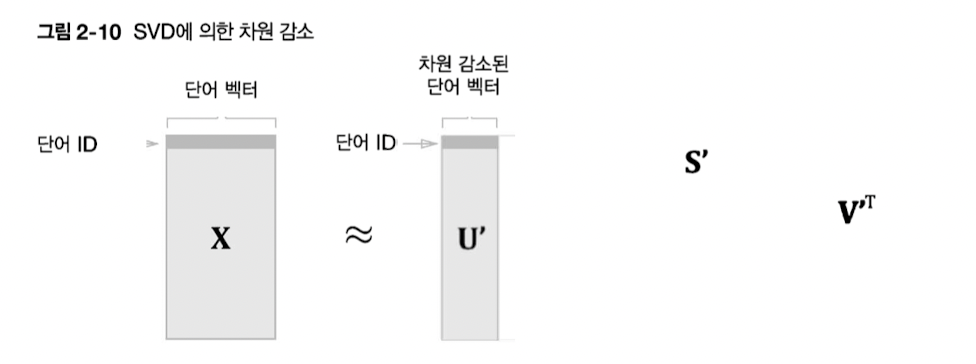

In [3]:
Image("/Users/choeunsol/Python/주피터 이미지용 사진/ch2_10.png")

행렬 $\boldsymbol S$에서 특잇값이 작다면 중요도가 낮다는 뜻이므로, 행렬 $\boldsymbol U$에서 여분의 열벡터를 깎아내어 원래의 행렬을 근사할 수 있다.

이를 단어의 PPMI 행렬에 적용해보자. 행렬 $\boldsymbol X$의 각 행에는 해당 단어 ID의 단어 벡터가 저장되어 있으며, 그 단어가 행렬 $\boldsymbol U'$라는 차원 감소된 벡터로 표현되는 것이다.

### SVD에 의한 차원 감소

이제 SVD를 파이썬 코드로 살펴보자. SVD는 linalg 모듈이 제공하는 svd 메서드로 실행할 수 있다.

그렇다면 동시발생행렬을 만들어 PPMI 행렬로 변환한 다음 SVD를 적용해보겠다.

In [4]:
import sys, os
os.getcwd()

'/Users/choeunsol/Python/밑바닥부터 시작하는 딥러닝 2'

In [9]:
os.chdir("/Users/choeunsol/Python/deep_learning_from_scratch/deep-learning-from-scratch-2-master/ch02")
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from common.util import preprocess, create_co_matrix, ppmi

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(id_to_word)
C = create_co_matrix(corpus, vocab_size, window_size = 1)
W = ppmi(C)

U, S, V = np.linalg.svd(W)

이제 SVD를 수행할 수 있다. 이 코드에서 SVD에 의해 변환된 밀집벡터 표현은 변수 $U$에 저장된다.

단어 ID가 0인 단어 벡터를 보자.

In [10]:
print(C[0]) # 동시발생 행렬

[0 1 0 0 0 0 0]


In [11]:
print(W[0]) # PPMI 행렬

[0.        1.8073549 0.        0.        0.        0.        0.       ]


In [12]:
print(U[0]) # SVD

[ 3.4094876e-01 -1.1102230e-16 -3.8857806e-16 -1.2051624e-01
 -9.3232495e-01  0.0000000e+00 -1.8004051e-16]


이 결과에서 보듯 원래는 희소벡터인 W[0]이 SVD에 의하여 밀집벡터 U[0]으로 변했다.

그리고 이 밀집벡터의 차원을 감소시키려면, 예컨대 2차원 벡터로 줄이려면 단순히 처음의 두 원소를 꺼내면 된다.

In [13]:
print(U[0, :2])

[ 3.4094876e-01 -1.1102230e-16]


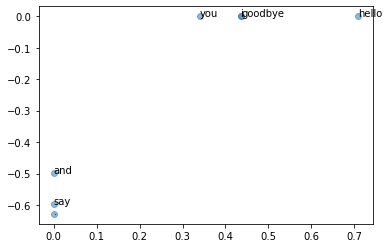

In [15]:
for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))
    ## annotate는 주석을 달아준다. 위 명령문은 (U[word_id, 0], U[word_id, 1])이라는 좌표에 word라는 주석을 달라는 뜻이다.
plt.scatter(U[:,0], U[:,1], alpha = 0.5)
plt.show()

위 그림을 보면 "goodbye"와 "hello", "you"와 "i"가 가까이 있음을 알 수 있다.

하지만 지금 사용한 말뭉치가 작아서 이 결과를 그대로 받아들이기에는 무리가 있다.

따라서 PTB 데이터셋이라는 큰 말뭉치를 사용하여 똑같은 실험을 수행해보자. 우선은 PTB 데이터셋이 무엇인지부터 간단하게 설명하겠다.

<font color = red> WARNING_ 행렬의 크기가 $N$이면 SVD 계산은 $N^3$이 걸린다. 계산량이 $N$의 3제곱에 비례해 늘어난다는 뜻이다. 이는 현실적으로 감당하기 어려운 수준이므로 Truncated SVD 같은 더 빠른 기법을 이용한다. Truncated SVD는 특잇값이 작은 것은 버리는 방식으로 성능 향상을 꾀한다. 다음 절에서도 옵션으로 사이킷런(scikit-learn) 라이브러리의 Truncated SVD를 이용한다. </font>

### PTB 데이터셋

지금까지는 아주 작은 텍스트 데이터를 말뭉치로 사용했다. 그래서 이번 절에서는 본격적인 말뭉치를 이용해보겠다. 그것이 바로 **펜 트리뱅크(PTB)** 이다.

<font color = blue> NOTE. PTB 말뭉치는 주어진 기법의 품질을 측정하는 벤치마크로 자주 이용된다. 이 책에서도 PTB 말뭉치를 이용하여 다양한 실험을 수행한다. </font>

우리가 이용할 PTB 말뭉치는 텍스트 파일로 제공되며, 원래의 PTB 문장의 몇 가지 전처리를 해두었다. 예컨대 희소한 단어를 [unk]라는 특수 문자로 치환한다거나, 구체적인 숫자를 "N"으로 대체하는 등의 작업이 적용되었다.

PTB 말뭉치에서는 한 문장이 하나의 줄로 저장되어 있다. 이 책에서는 각 문장을 연결한 '하나의 큰 시계열 데이터'로 취급한다. 이때 각 문장 끝에 [eos]라는 특수 문자를 삽입한다.

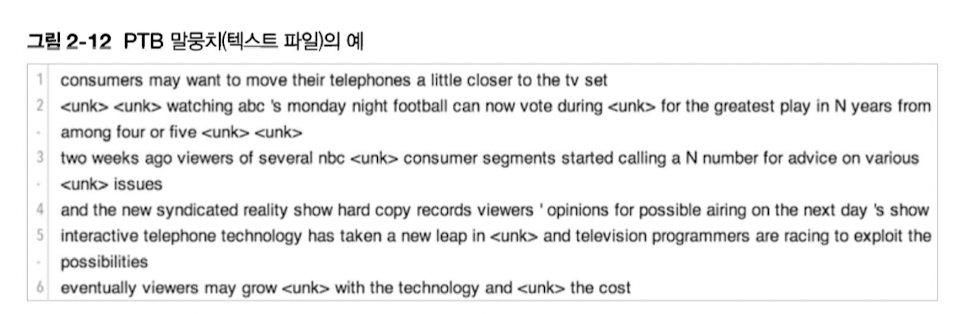

In [17]:
Image("/Users/choeunsol/Python/주피터 이미지용 사진/ch2_12.png")

이 책에서는 PTB 데이터셋을 쉽게 이용할 수 있도록 전용 파이썬 코드를 준비했다. 이 코드는 dataset/ptb.py에 담겨 있으며, 작업 디렉터리가 '각 장의 디렉터리'라고 가정하고 동작한다. 예를 들어 터미널에서 ch02 디렉터니로 이동한 다음 python.show_ptb.py 명령을 실행하면 된다.

In [18]:
import sys, os
os.getcwd()

'/Users/choeunsol/Python/deep_learning_from_scratch/deep-learning-from-scratch-2-master/ch02'

In [20]:
sys.path.append(os.pardir)
from dataset import ptb

corpus, word_to_id, id_to_word = ptb.load_data('train')
## PTB 데이터셋 로드

print('말뭉치 크기:', len(corpus))

Done
말뭉치 크기: 929589


In [22]:
print('corpus[:30]', corpus[:30])

corpus[:30] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


In [25]:
print('id_to_word[0] :', id_to_word[0])

id_to_word[0] : aer


In [26]:
print('id_to_word[1] :', id_to_word[1])

id_to_word[1] : banknote


In [27]:
print('id_to_word[2] :', id_to_word[2])

id_to_word[2] : berlitz


In [28]:
print("word_to_id['car']:", word_to_id['car'])

word_to_id['car']: 3856


In [29]:
print("word_to_id['happy']:", word_to_id['happy'])

word_to_id['happy']: 4428


In [30]:
print("word_to_id['lexus']:", word_to_id['lexus'])

word_to_id['lexus']: 7426


    위와 같이 말뭉치를 다루는 방법은 지금까지와 같다. corpus는 단어 ID 목록이 저장된다.

    id_to_word는 단어 ID에서 단어로 변환하는 딕셔너리, word_to_id는 단어에서 단어 ID로 변환하는 딕셔너리이다.

    앞의 코드에서 ptb.load_data()는 데이터를 읽어들인다. 이때 인수로는 'train', 'test', 'valid' 중 하나를 지정할 수 있는데, 차례대로 훈련용, 테스트용, 검증용 데이터를 가리킨다.

### PTB 데이터셋 평가

PTB 데이터셋에 통계 기반 기법을 적용해보자. 이번에는 큰 행렬에 SVD를 적용해야 하므로 고속 SVD를 이용할 것을 추천한다. 

고속 SVD를 이용하려면 sklearn 모듈을 설치해야 한다.

In [45]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [46]:
import sklearn

In [47]:
sys.path.append(os.pardir)
import numpy as np
from common.util import most_similar, create_co_matrix, ppmi
from dataset import ptb

window_size = 2
wordvec_size = 100

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
print('동시발생 수 계산 ...')

동시발생 수 계산 ...


In [48]:
C = create_co_matrix(corpus, vocab_size, window_size)
print('PPMI 계산 ...')

PPMI 계산 ...


In [53]:
W = ppmi(C, verbose = False)

In [54]:
# truncated SVD
from sklearn.utils.extmath import randomized_svd
U, S, V = randomized_svd(W, n_components = wordvec_size, n_iter = 5, random_state = None)
word_vecs = U[:, :wordvec_size]
## 차원 축소를 진행시켜, wordvec_size 크기의 열 벡터만을 뽑아낸다.
querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top = 5)


[query] you
 i: 0.6282685995101929
 we: 0.6148431301116943
 anybody: 0.5569705367088318
 do: 0.555469810962677
 else: 0.5310436487197876

[query] year
 month: 0.714616596698761
 last: 0.62819504737854
 quarter: 0.6116159558296204
 earlier: 0.597152829170227
 week: 0.5743921995162964

[query] car
 auto: 0.6257255673408508
 luxury: 0.5899825692176819
 truck: 0.5603757500648499
 corsica: 0.5475842952728271
 domestic: 0.5237846970558167

[query] toyota
 motor: 0.7094579339027405
 motors: 0.651882529258728
 nissan: 0.6456748247146606
 honda: 0.5896320343017578
 lexus: 0.5645708441734314
